In [1]:
%matplotlib inline
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


Importing plotly failed. Interactive plots will not work.


In [2]:
import config, csv
from binance.client import Client

client = Client(config.API_KEY, config.API_SECRET)

candlesticks = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_15MINUTE, "01 Jan, 2015", "20 Apr, 2021")


In [3]:
for candlestick in  candlesticks:
    candlestick[0] = datetime.utcfromtimestamp(candlestick[0]/1000)
    del candlestick[-1]



In [4]:
columns = [
    'open_time',
    'open',
    'high',
    'low',
    'close',
    'volume',
    'close_time',
    'quote_asset_volume',
    'number_of_trades',
    'taker_buy_base_asset_volume',
    'taker_buy_quote_asset_volume'
]

In [5]:
df = pd.DataFrame(candlesticks, columns = columns)

In [6]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2017-08-17 04:00:00,301.13000000,301.13000000,298.00000000,298.00000000,5.80167000,1502943299999,1744.76610410,22,5.48392000,1649.44882410
1,2017-08-17 04:15:00,298.00000000,300.80000000,298.00000000,299.39000000,31.44065000,1502944199999,9396.91781270,26,12.11712000,3625.16705070
2,2017-08-17 04:30:00,299.39000000,300.79000000,299.39000000,299.60000000,52.93579000,1502945099999,15851.07541500,39,28.38159000,8499.79347700
3,2017-08-17 04:45:00,299.60000000,302.57000000,299.60000000,301.61000000,35.49066000,1502945999999,10692.04484920,42,34.58114000,10419.03143720
4,2017-08-17 05:00:00,301.61000000,302.57000000,300.95000000,302.01000000,81.69235000,1502946899999,24620.72475690,52,80.26344000,24189.75121180


In [7]:
data = df[['open_time', 'close']]
data.columns = ['ds', 'y']

In [8]:
data['y'] = data['y'].astype('float')

<ipython-input-8-b5d26fbf5cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['y'].astype('float')


In [9]:
train = data[data['ds']<'2021-03-01']
test =  data[data['ds']>='2021-03-01']

In [10]:

m = Prophet()

m.fit(train)

In [11]:
test

,ds,y
123519,2021-03-01 00:00:00,1421.99
123520,2021-03-01 00:15:00,1439.09
123521,2021-03-01 00:30:00,1443.44
123522,2021-03-01 00:45:00,1440.76
123523,2021-03-01 01:00:00,1432.04
...,...,...
128309,2021-04-19 23:00:00,2186.95
128310,2021-04-19 23:15:00,2156.19
128311,2021-04-19 23:30:00,2160.21
128312,2021-04-19 23:45:00,2161.12


In [12]:
forecast = m.predict(test[['ds']])

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-01 00:00:00,1741.995525,1746.093932,1899.254098,1741.995525,1741.995525,79.432297,79.432297,79.432297,0.552606,...,0.806655,0.806655,0.806655,78.073037,78.073037,78.073037,0.0,0.0,0.0,1821.427822
1,2021-03-01 00:15:00,1742.072913,1745.449294,1895.013314,1742.072913,1742.072913,79.530620,79.530620,79.530620,0.644698,...,0.827578,0.827578,0.827578,78.058344,78.058344,78.058344,0.0,0.0,0.0,1821.603533
2,2021-03-01 00:30:00,1742.150301,1744.704476,1895.485285,1742.150301,1742.150301,79.616483,79.616483,79.616483,0.724022,...,0.848848,0.848848,0.848848,78.043613,78.043613,78.043613,0.0,0.0,0.0,1821.766784
3,2021-03-01 00:45:00,1742.227689,1743.766323,1892.689389,1742.227689,1742.227689,79.686711,79.686711,79.686711,0.787419,...,0.870449,0.870449,0.870449,78.028842,78.028842,78.028842,0.0,0.0,0.0,1821.914400
4,2021-03-01 01:00:00,1742.305077,1744.753839,1896.998385,1742.305077,1742.305077,79.738845,79.738845,79.738845,0.832448,...,0.892363,0.892363,0.892363,78.014034,78.014034,78.014034,0.0,0.0,0.0,1822.043922


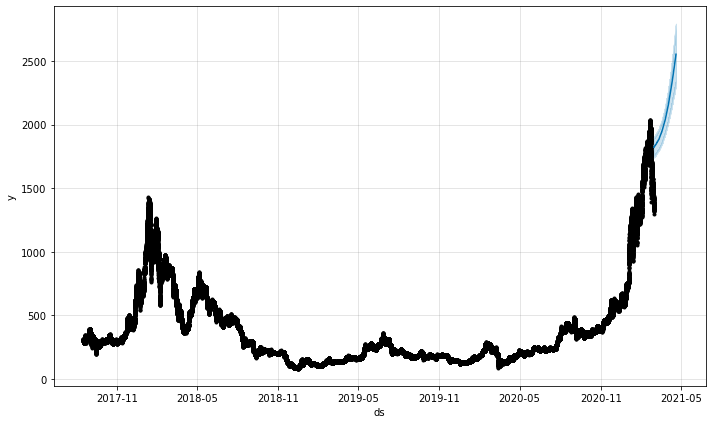

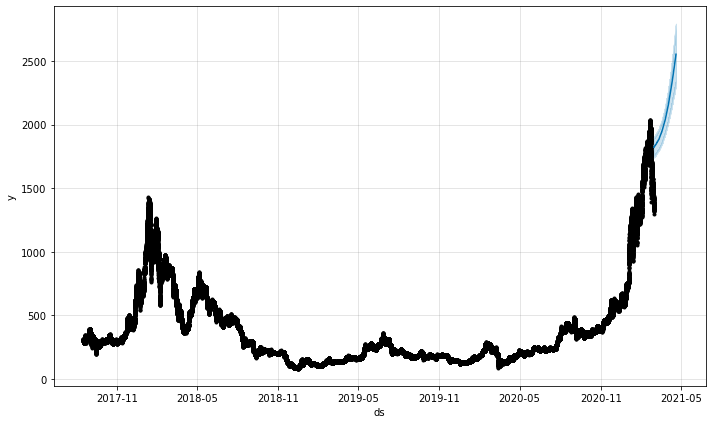

In [14]:
m.plot(forecast)

In [15]:
test.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [16]:
viz_df = test.join(forecast[['yhat', 'yhat_lower','yhat_upper']])

In [17]:
forecast[['yhat', 'yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2021-03-01 00:00:00,1821.427822,1746.093932,1899.254098
2021-03-01 00:15:00,1821.603533,1745.449294,1895.013314
2021-03-01 00:30:00,1821.766784,1744.704476,1895.485285
2021-03-01 00:45:00,1821.914400,1743.766323,1892.689389
2021-03-01 01:00:00,1822.043922,1744.753839,1896.998385
...,...,...,...
2021-04-19 23:00:00,2551.335490,2335.314775,2761.432649
2021-04-19 23:15:00,2551.677125,2323.893371,2766.407833
2021-04-19 23:30:00,2552.020824,2325.364994,2774.965744


In [18]:
test.index[0]

Timestamp('2021-03-01 00:00:00')

In [19]:
forecast.index[0]

Timestamp('2021-03-01 00:00:00')

In [20]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2021-03-01 00:00:00,1421.99,1821.427822,1746.093932,1899.254098
2021-03-01 00:15:00,1439.09,1821.603533,1745.449294,1895.013314
2021-03-01 00:30:00,1443.44,1821.766784,1744.704476,1895.485285
2021-03-01 00:45:00,1440.76,1821.914400,1743.766323,1892.689389
2021-03-01 01:00:00,1432.04,1822.043922,1744.753839,1896.998385


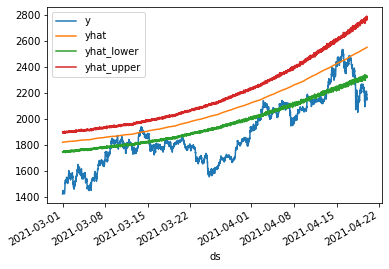

In [21]:
viz_df.plot()